In [ ]:
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, IntSlider, ToggleButtons
from tensorflow.keras.models import load_model

In [ ]:
from matplotlib import colors

def plot_prediction(mri,mask,prediction,slice_no,channel):
    slice_num = slice_no  # example slice number (choose between 0 and 154)
    channel = channel     # example channel (0: FLAIR, 1: T1, 2: T1-Gd, 3: T2)
    #cmap = colors.ListedColormap(['black', 'red','green','yellow','blue'])

    # Extract the corresponding slice and channel from the transformed image and mask
    slice_image = mri[:, :, slice_num, channel]
    slice_mask = mask[:, :, slice_num]

    pred_slice = prediction[:, :, slice_num]

    # Original image and mask
    fig, axes = plt.subplots(1, 3, figsize=(10, 10))
    axes[0].imshow(slice_image,cmap='gray')
    axes[0].set_title('Original Image')
    axes[0].axis('off')

    axes[1].imshow(slice_mask)
    axes[1].set_title('Original Mask')
    axes[1].axis('off')

    # Predicted mask
    axes[2].imshow(pred_slice)
    axes[2].set_title('Predicted Mask')
    axes[2].axis('off')

    plt.tight_layout()
    plt.show()

In [ ]:
def plot_results_byclass(mri, mask, prediction,mod_no, slice_num=None):
    colors = ['#440154', '#3b528b', '#21918c', '#fde725', '#d62728']  # Black, Blue, Orange, Green, Red
    cmap = [LinearSegmentedColormap.from_list(f'custom_{i}', ['#440154', color], N=256) for i, color in enumerate(colors)]

    if slice_num is None:
        slice_num = mri.shape[2] // 2  # Middle slice by default

    # Determine the number of unique classes in the prediction
    num_classes = len(np.unique(prediction))

    # Create a figure with a row for each class plus two additional rows
    fig, axes = plt.subplots(1, 5, figsize=(15, 5))
    fig.suptitle(f"MRI Segmentation Results - Slice {slice_num}", fontsize=16)

    # Plot true image slice (using the first channel of MRI)
    axes[0].imshow(mri[:, :, slice_num, mod_no], cmap='gray')
    axes[0].set_title("MRI Image Slice")
    axes[0].axis('off')

    # Plot ground truth mask
    axes[1].imshow(mask[:, :, slice_num], cmap='viridis')
    axes[1].set_title("Ground Truth Mask")
    axes[1].axis('off')

    # Plot prediction mask for class 1 edema
    class_mask = (prediction[:, :, slice_num] == 1).astype(int)
    axes[2].imshow(class_mask, cmap=cmap[1])
    axes[2].set_title("Edema")
    axes[2].axis('off')

    # Plot prediction mask for class 2 non-enhancing
    class_mask = (prediction[:, :, slice_num] == 2).astype(int)
    axes[3].imshow(class_mask, cmap=cmap[2])
    axes[3].set_title("Non-enhancing")
    axes[3].axis('off')

    # Plot prediction mask for class 2 non-enhancing
    class_mask = (prediction[:, :, slice_num] == 3).astype(int)
    axes[4].imshow(class_mask, cmap=cmap[3])
    axes[4].set_title("Enhancing")
    axes[4].axis('off')

    plt.tight_layout()
    plt.show()


Prediction -1

In [ ]:
mri = nib.load("/home/manuri/data/3D_multi/output/val/images/BRATS_207.nii.gz").get_fdata().astype(np.float32)

In [ ]:
mask = nib.load("/home/manuri/data/3D_multi/output/val/masks/BRATS_207.nii.gz").get_fdata().astype(np.uint8)

In [ ]:
pred = nib.load("/home/manuri/nnunet-master/data/nnUNet_results/Dataset001_BrainTumour/pred_3D_006/BRATS_207.nii.gz").get_fdata().astype(np.uint8)

In [ ]:
print(mri.shape)
print(mask.shape)
print(pred.shape)

(128, 128, 160, 4)
(128, 128, 160)
(240, 240, 155)


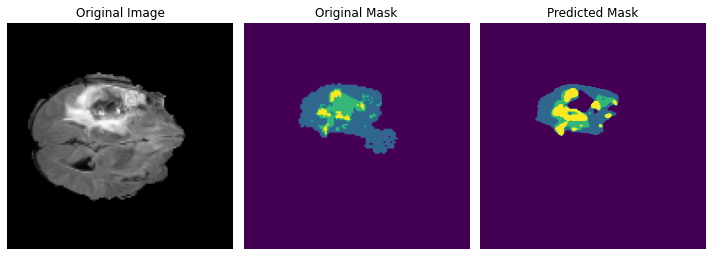

In [ ]:
plot_prediction(mri,mask,pred,slice_no=65,channel=0)

In [ ]:
plot_results_byclass(mri,mask,pred,0,65)

Prediction - 2

In [ ]:
mask = nib.load("/home/manuri/data/3D_multi/output/val/masks/BRATS_469.nii.gz").get_fdata().astype(np.uint8)

In [ ]:
mri = nib.load("/home/manuri/data/3D_multi/output/val/images/BRATS_469.nii.gz").get_fdata().astype(np.float32)

In [ ]:
prediction = nib.load("/home/manuri/nnunet-master/data/nnUNet_results/Dataset001_BrainTumour/pred_3D_006/BRATS_469.nii.gz").get_fdata().astype(np.uint8)

In [ ]:
middle_slice = mri.shape[2] // 2
print(middle_slice)

80


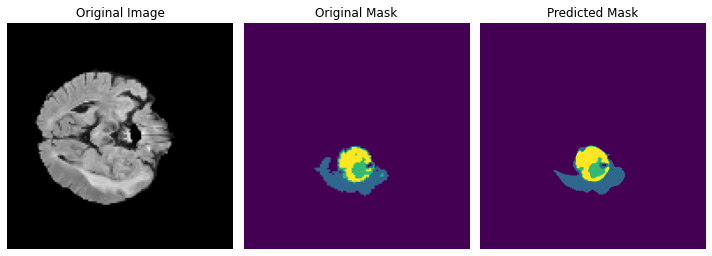

In [ ]:
plot_prediction(mri,mask,prediction,55,0)

Prediction-3

In [ ]:
mask = nib.load("/home/manuri/data/3D_multi/output/val/masks/BRATS_154.nii.gz").get_fdata().astype(np.uint8)

In [ ]:
mri = nib.load("/home/manuri/data/3D_multi/output/val/images/BRATS_154.nii.gz").get_fdata().astype(np.float32)

In [ ]:
prediction = nib.load("/home/manuri/nnunet-master/data/nnUNet_results/Dataset001_BrainTumour/pred_3D_006/BRATS_154.nii.gz").get_fdata().astype(np.uint8)

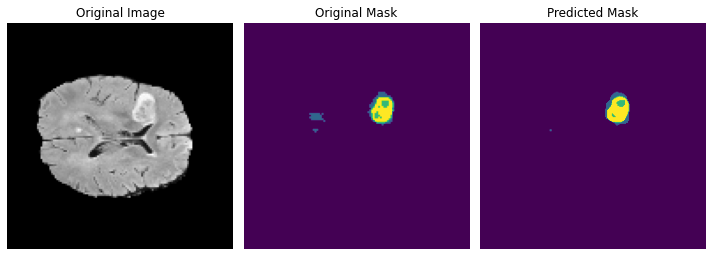

In [ ]:
plot_prediction(mri,mask,prediction,80,0)

Prediction-4

In [ ]:
mask = nib.load("/home/manuri/data/3D_multi/output/val/masks/BRATS_037.nii.gz").get_fdata().astype(np.uint8)

In [ ]:
mri = nib.load("/home/manuri/data/3D_multi/output/val/images/BRATS_037.nii.gz").get_fdata().astype(np.float32)

In [ ]:
prediction = nib.load("/home/manuri/nnunet-master/data/nnUNet_results/Dataset001_BrainTumour/pred_3D_006/BRATS_037.nii.gz").get_fdata().astype(np.uint8)

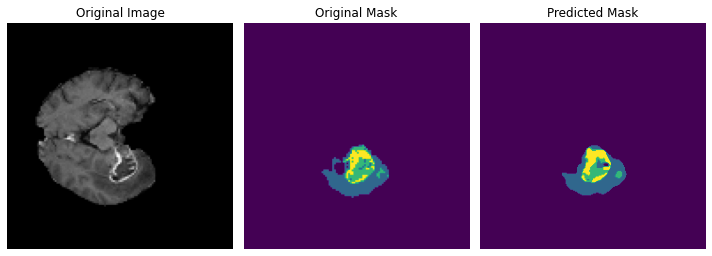

In [ ]:
plot_prediction(mri,mask,prediction,50,2)

In [ ]:
plot_results_byclass(mri,mask,pred,2,50)